In [1]:
%cd ../
%matplotlib inline

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.utils as utils

In [3]:
import glob

#data_files = glob.glob('data/pieman_data/*.nii')
data_files = glob.glob('/home/eli/Documents/new_pieman/sub-*/func/*.nii')[0:15]

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
dtfa = DTFA.DeepTFA(data_files, num_factors=25, embedding_dim=2)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


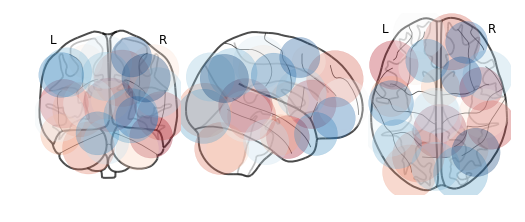

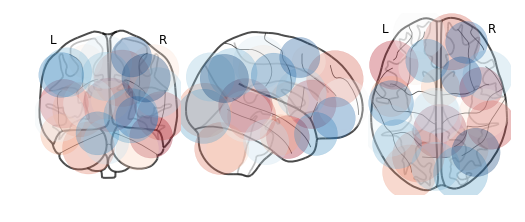

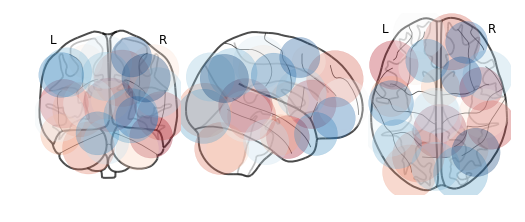

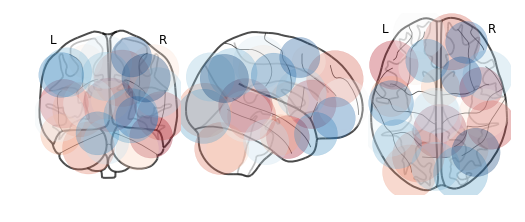

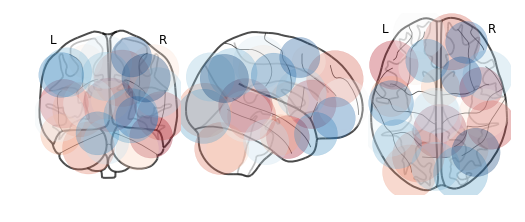

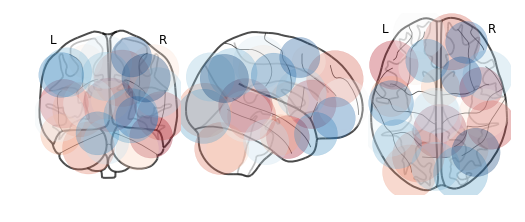

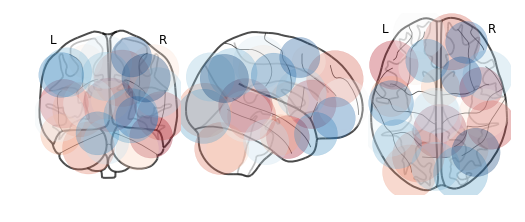

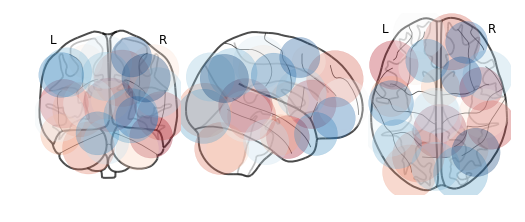

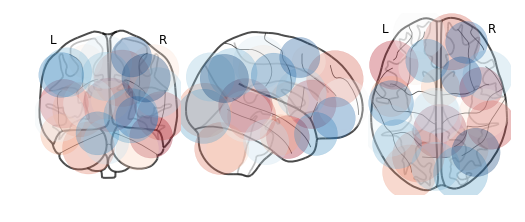

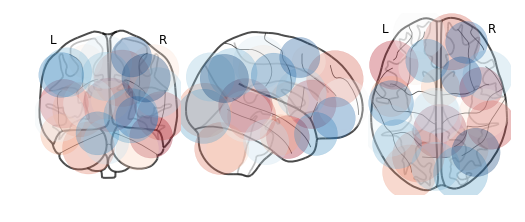

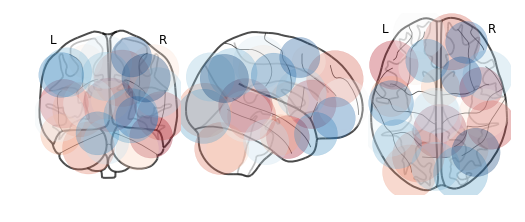

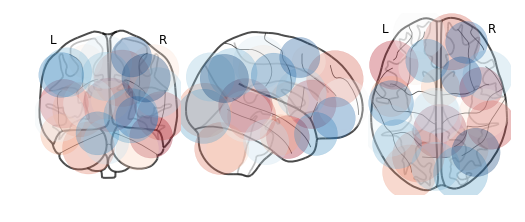

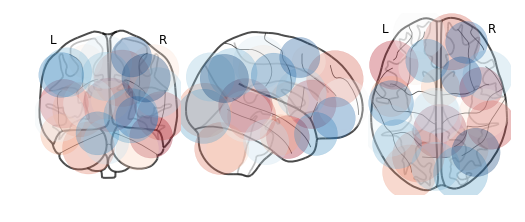

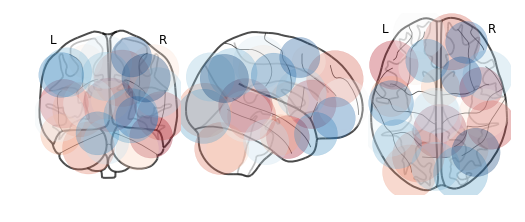

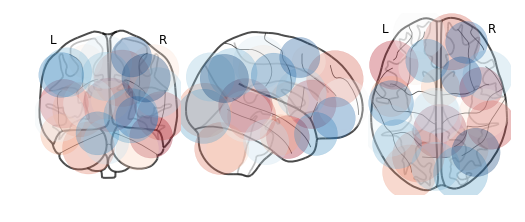

In [6]:
for s in range(dtfa.num_subjects):
    dtfa.plot_factor_centers(s)

In [7]:
losses = dtfa.train(num_steps=500, learning_rate=1e-1, log_level=logging.INFO, num_particles=1,
                    use_cuda=True)

04/06/2018 10:29:55 [Epoch 1] (763ms) Posterior free-energy 2.42652877e+10
04/06/2018 10:29:56 [Epoch 2] (642ms) Posterior free-energy 3.02157758e+11
04/06/2018 10:29:56 [Epoch 3] (566ms) Posterior free-energy 4.38087188e+10
04/06/2018 10:29:57 [Epoch 4] (567ms) Posterior free-energy 1.25847937e+11
04/06/2018 10:29:57 [Epoch 5] (582ms) Posterior free-energy 9.10848000e+10
04/06/2018 10:29:58 [Epoch 6] (551ms) Posterior free-energy 4.72786289e+10
04/06/2018 10:29:59 [Epoch 7] (647ms) Posterior free-energy 2.90571551e+10
04/06/2018 10:29:59 [Epoch 8] (581ms) Posterior free-energy 2.39869440e+10
04/06/2018 10:30:00 [Epoch 9] (547ms) Posterior free-energy 2.29180908e+10
04/06/2018 10:30:00 [Epoch 10] (549ms) Posterior free-energy 2.28574638e+10
04/06/2018 10:30:01 [Epoch 11] (545ms) Posterior free-energy 2.26935235e+10
04/06/2018 10:30:01 [Epoch 12] (562ms) Posterior free-energy 2.26185646e+10
04/06/2018 10:30:02 [Epoch 13] (555ms) Posterior free-energy 2.24052941e+10
04/06/2018 10:30:02 [

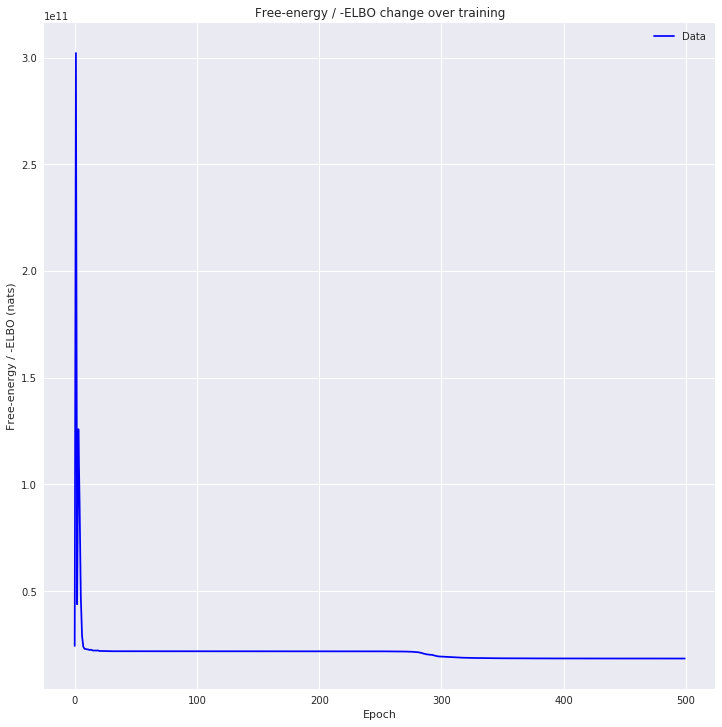

In [8]:
utils.plot_losses(losses)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/nilearn/plotting/displays.py:1291: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if node_color == 'auto':


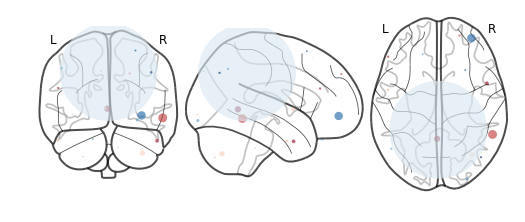

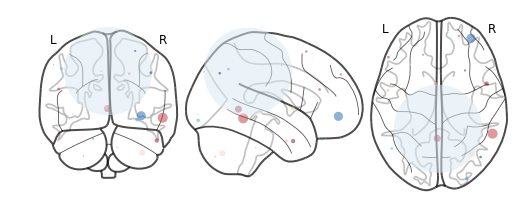

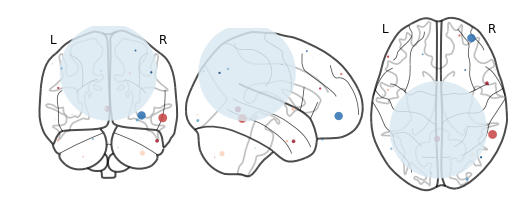

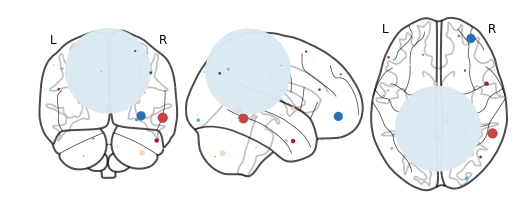

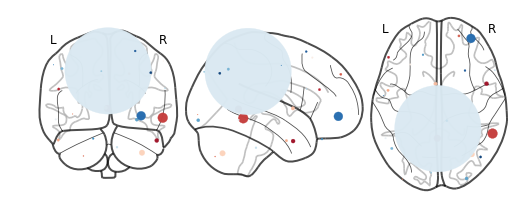

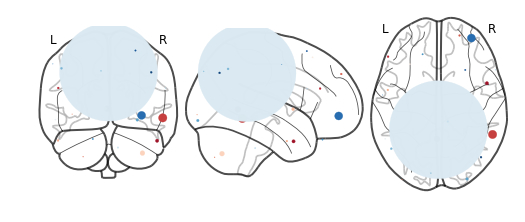

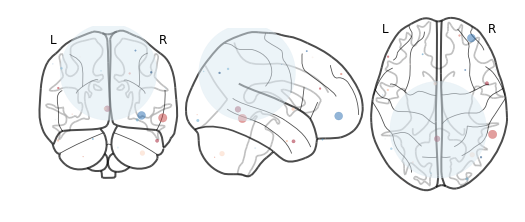

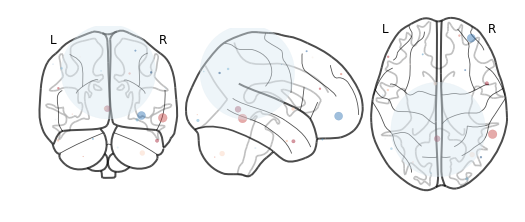

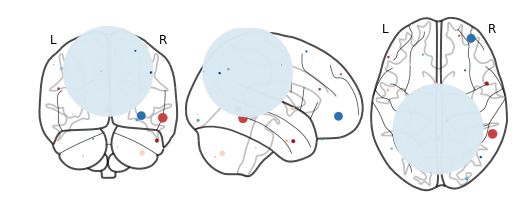

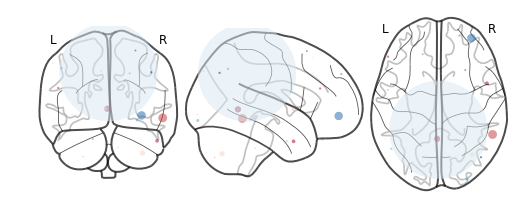

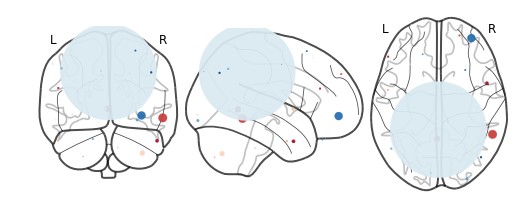

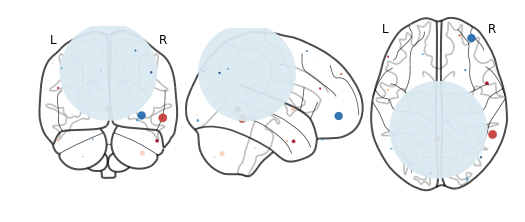

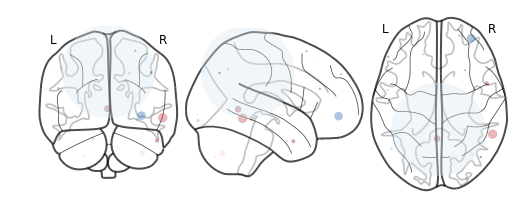

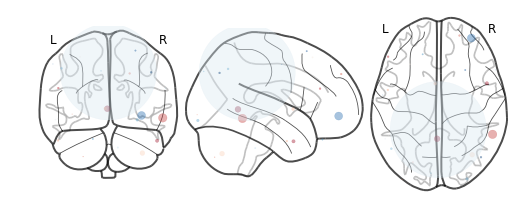

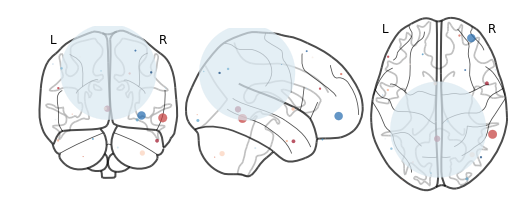

In [9]:
for s in range(dtfa.num_subjects):
    dtfa.plot_factor_centers(s)